   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
Missing values: CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


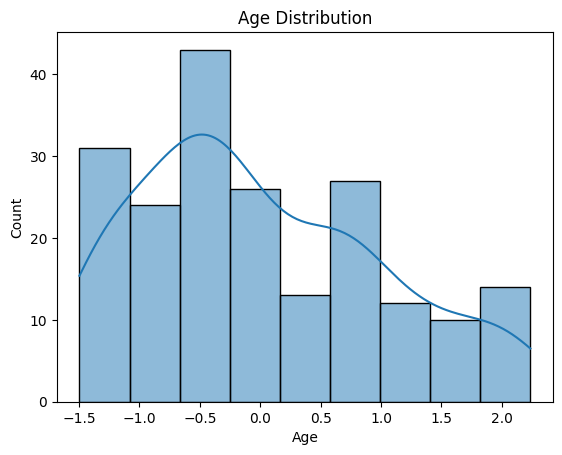

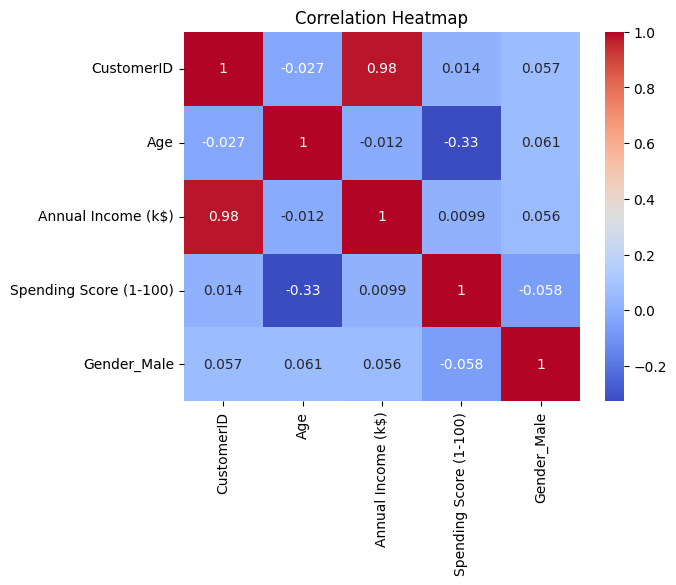

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

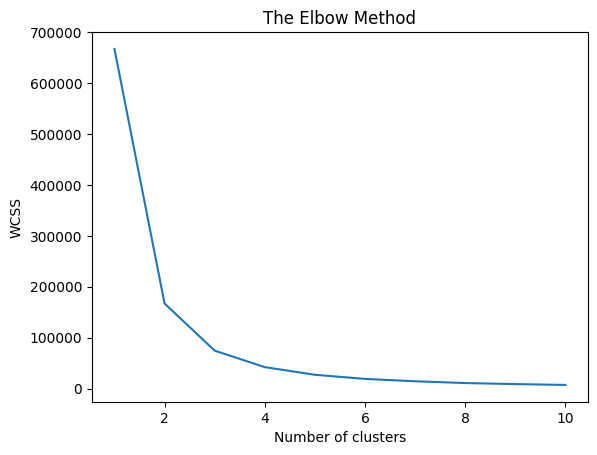

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


         CustomerID       Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                     
0             180.0 -0.115264            1.406720                0.050941   
1              99.5  0.242213           -0.008970               -0.059203   
2              20.5 -0.301420           -1.378298               -0.035910   
3             139.5 -0.208123            0.510134                0.001941   
4              60.0  0.395361           -0.579236                0.042007   

         Gender_Male  
Cluster               
0           0.463415  
1           0.425000  
2           0.400000  
3           0.500000  
4           0.410256  
Silhouette Score: 0.5423502414421357


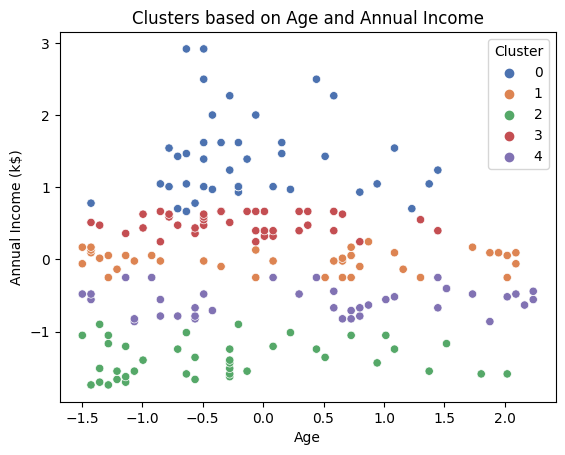

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Load data from CSV and check
data = pd.read_csv('Mall_Customers.csv')

# If data is None or empty, we should stop further execution
if data is None or data.empty:
    raise ValueError("Data not loaded correctly")

print(data.head())

# 2. Identify and handle missing values
missing = data.isnull().sum()
print("Missing values:", missing)

# For demonstration, we assume there's no missing data or handle it appropriately

# 3. One-hot encode 'Gender'
# Make sure the column name matches the dataset
if 'Gender' in data.columns:
    data = pd.get_dummies(data, columns=['Gender'], drop_first=True)
else:
    raise ValueError("Gender column missing in data")

# 4. Standardize relevant features
scaler = StandardScaler()
scaled_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
data[scaled_columns] = scaler.fit_transform(data[scaled_columns])

# 5. Plotting distributions
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 6. KMeans clustering
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Assuming optimal clusters = 5 (this is just a placeholder, you might want to choose based on the elbow method)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(data)
data['Cluster'] = clusters

cluster_summary = data.groupby('Cluster').mean()
print(cluster_summary)

# 7. Calculate silhouette score
numeric_data = data.drop(['Cluster'], axis=1)
score = silhouette_score(numeric_data, kmeans.labels_)
print(f'Silhouette Score: {score}')

# 8. Visualization
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Cluster', data=data, palette="deep")
plt.title('Clusters based on Age and Annual Income')
plt.show()
